<h1 align="center">Interacción entre dos sistemas formados por dados.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

## 1. Cargar Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## 2. Planteamiento del problema

Sean dos sistemas $A_1$ y $A_2$, aislados del resto del universo.  Ambos sistemas están formados por partículas que se representarán por $n_1$ y $n_2$, respectivamente, tal que $N=n_1 + n_2$ es una constante. Todos los dados tiene igual número $C$ de caras, cada una marcada con un simbolo diferenet y la ocurrencia de cada cara tiene igual probabilidad. Se asume que cada dado contribuye al sistema con la misma energía $\delta E$, independiente del valor de su cara. Si $\Omega_1$ es el número de estados del sistema $A_1$ y $\Omega_2$, de $A_2$:

**2.1.** ¿Cuánto es el número de estados $\Omega_T$ del sistema combinado si los dados son distinguibles?

**2.1.** ¿Cuánto es el número de estados $\Omega_T$ del sistema combinado si los dados son indistinguibles?

## 3. Métodos

In [2]:
def next(last, base):
    L = len(last)-1
    last[-1] += 1
    for i in range(L, 0, -1):
        if last[i] > base:
            last[i] = 1
            last[i-1] += 1
    if last[0] > base:
        last[0] = 1
        last = [1] + last
    return last

In [3]:
def dices_values(N, C):
    if N == 0:
        return []
    state = [1 for i in range(N)]; state[-1] = 0
    all_states = []
    while len(state) == N:
        state = next(state, C)
        all_states.append(state.copy())
    return all_states[:-1]

In [4]:
def distinguible_dices(states):
    if len(states) == 0:
        return 1
    return len(states)

In [5]:
def indistinguishable_values(states):
    if len(states) == 0:
        return 1
    sorted_dices = [np.array2string(np.sort(d)) for d in states]
    return list(Counter(sorted_dices).keys())

In [6]:
def indistinguishable_dices(states):
    if len(states) == 0:
        return 1
    sorted_dices = [np.array2string(np.sort(d)) for d in states]
    return len(Counter(sorted_dices).keys())

## 4. Dados distinguibles
Cuando los dados se pueden diferenciar entre si, por ejemplo, cada dado tiene un color diferente, entonces, un estado \[1, 2, 1] será diferente de otro \[2, 1, 1], a pesar de tener los mismos números en las caras de los dados.

### 4.1. Ejemplo

In [7]:
N = 2 # Número de dados
C = 4 # Número de caras de cada dado
states = dices_values(N, C)
pd.DataFrame(states, columns=['d%d' % (d+1) for d in range(N)])

,d1,d2
0,1,1
1,1,2
2,1,3
3,1,4
4,2,1
5,2,2
6,2,3
7,2,4
8,3,1
9,3,2


In [8]:
print('Número de estados: %d' % distinguible_dices(states))

Número de estados: 16


### 4.2. Dos sistemas de dados distinguibles interactuantes con un valor constante de dados

In [9]:
N = 5; C = 4
data_dict = {'n1':[], 'n2':[], '\Omega_1':[], '\Omega_2':[], '\Omega_T':[]}
for n1 in range(N+1):
    n2 = N - n1
    Omega_1 = distinguible_dices(dices_values(n1, C))
    Omega_2 = distinguible_dices(dices_values(n2, C))
    data_dict['n1'].append(n1)
    data_dict['n2'].append(n2)
    data_dict['\Omega_1'].append(Omega_1)
    data_dict['\Omega_2'].append(Omega_2)
    data_dict['\Omega_T'].append(Omega_1 * Omega_2)
pd.DataFrame(data_dict)

,n1,n2,\Omega_1,\Omega_2,\Omega_T
0,0,5,1,1024,1024
1,1,4,4,256,1024
2,2,3,16,64,1024
3,3,2,64,16,1024
4,4,1,256,4,1024
5,5,0,1024,1,1024


## 5. Dados indistinguibles
En este caso es imposible identificar un dado del otro, por lo tanto, es imposible diferenciar un estado \[1, 2, 1] de otro \[2, 1, 1].  Esto implica que todos los estados que tengan números similares en las caras de los dados, corresponden con un mismo estado.

### 5.1. Ejemplo

In [10]:
N = 2 # Número de dados
C = 4 # Número de caras de cada dado
states = dices_values(N, C)
indist = indistinguishable_values(states)
print('Número de estados %d' % len(indist))
print(indist)

Número de estados 10
['[1 1]', '[1 2]', '[1 3]', '[1 4]', '[2 2]', '[2 3]', '[2 4]', '[3 3]', '[3 4]', '[4 4]']


### 5.2. Dos sistemas de dados indistinguibles interactuantes con un valor constante de dados

In [11]:
N = 5; C = 4
data_dict = {'n1':[], 'n2':[], '$\Omega_1$':[], '$\Omega_2$':[], '$\Omega_T$':[]}
for n1 in range(N+1):
    n2 = N - n1
    Omega_1 = indistinguishable_dices(dices_values(n1, C))
    Omega_2 = indistinguishable_dices(dices_values(n2, C))
    data_dict['n1'].append(n1)
    data_dict['n2'].append(n2)
    data_dict['$\Omega_1$'].append(Omega_1)
    data_dict['$\Omega_2$'].append(Omega_2)
    data_dict['$\Omega_T$'].append(Omega_1 * Omega_2)
indist_data = pd.DataFrame(data_dict)
print(indist_data)

   n1  n2  $\Omega_1$  $\Omega_2$  $\Omega_T$
0   0   5           1          56          56
1   1   4           4          35         140
2   2   3          10          20         200
3   3   2          20          10         200
4   4   1          35           4         140
5   5   0          56           1          56


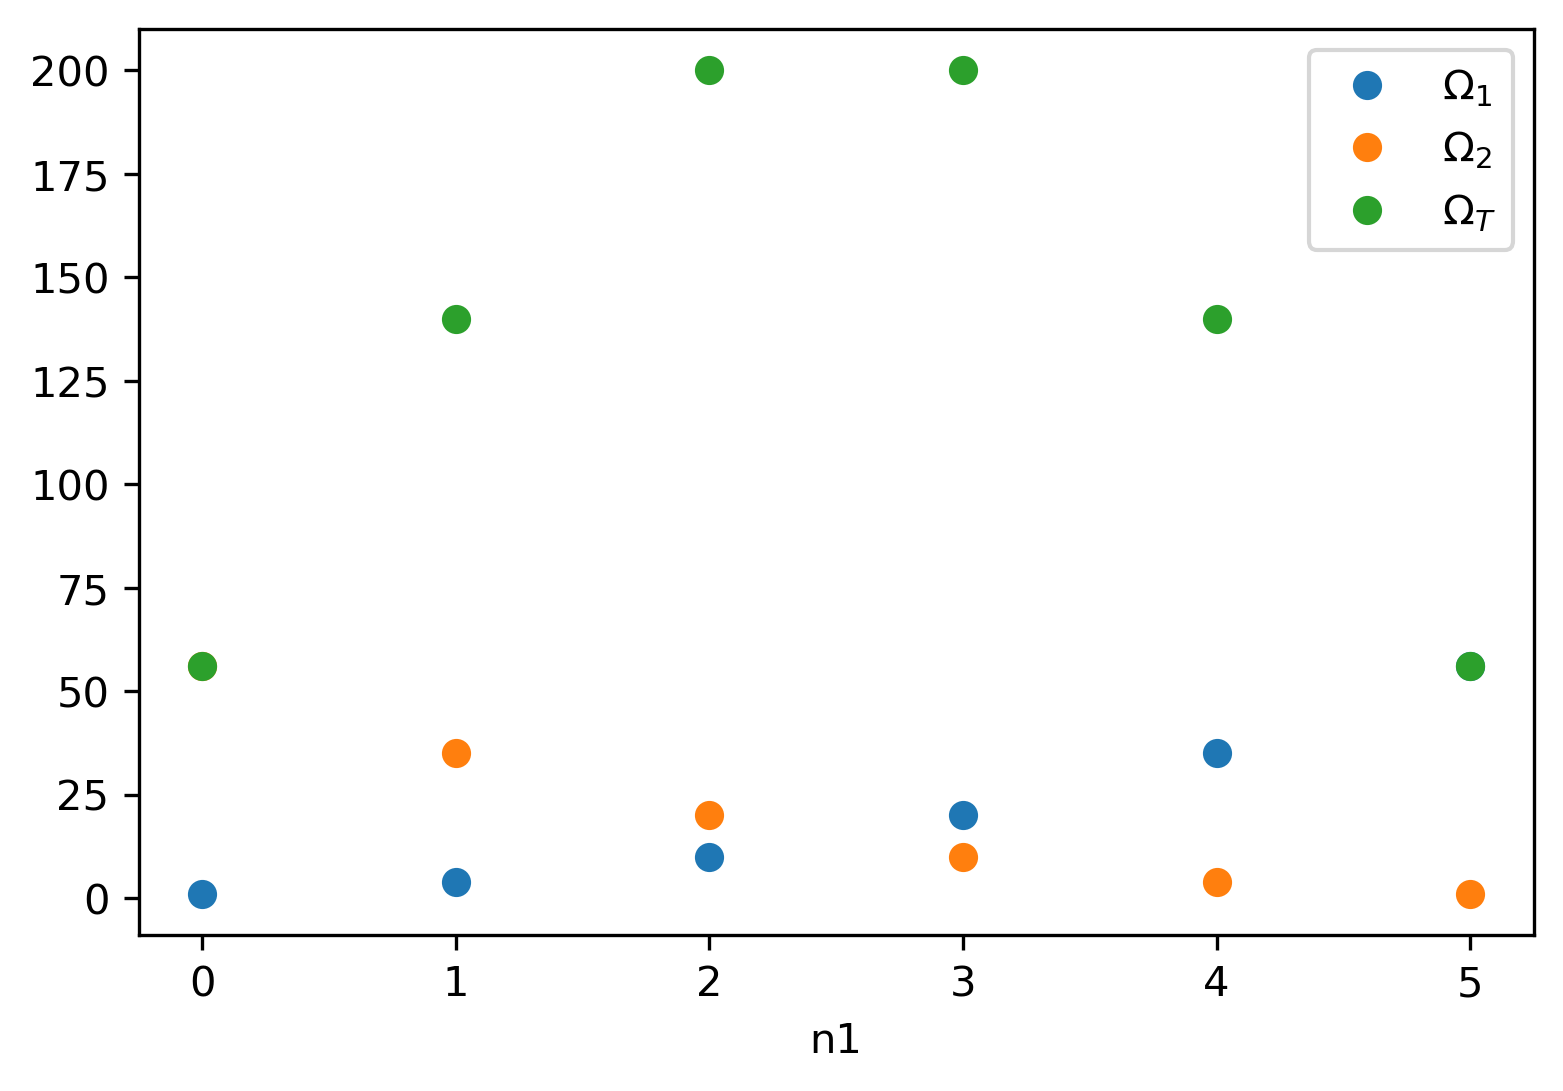

In [12]:
plt.figure(dpi=300)
_ = indist_data.plot(x='n1', y=['$\Omega_1$', '$\Omega_2$', '$\Omega_T$'], marker='o', linestyle = 'None', ax=plt.gca())

End!